In [1]:
import numpy as np # linear algebra, matrix operations
import pandas as pd # to read data
import matplotlib.pyplot as plt # plotting, showing images

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # import data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
X_train = X_train.flatten().reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) # convert to 2D
X_test = X_test.flatten().reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]) # convert to 2D
Y_train = Y_train.reshape(Y_train.shape[0], 1) # convert to 2D
Y_test = Y_test.reshape(Y_test.shape[0], 1)# convert to 2D
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 784) (60000, 1) (10000, 784) (10000, 1)


In [5]:
X_train = np.hstack((Y_train, X_train)) # stack data horizontally
X_test = np.hstack((Y_test, X_test))  # stack data horizontally
print(X_train.shape, X_test.shape)

(60000, 785) (10000, 785)


In [6]:
m, n = X_train.shape # n,m inverted because we will transpose
np.random.shuffle(X_train) # shuffle for randomness

dev_data = X_train[0:5000].T # dev data used for hyperparam tuning
Y_dev = dev_data[0]
X_dev = dev_data[1:n]
X_dev = X_dev / 255.0

train_data = X_train[5000:].T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train / 255.0

n_train, m_train = X_train.shape

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 0 0 ... 3 5 5] [6 5 7 ... 9 0 2]
0.09989090909090909
Iteration:  10
[0 0 0 ... 3 5 3] [6 5 7 ... 9 0 2]
0.17103636363636363
Iteration:  20
[0 0 0 ... 3 5 8] [6 5 7 ... 9 0 2]
0.24354545454545454
Iteration:  30
[0 0 0 ... 3 5 7] [6 5 7 ... 9 0 2]
0.31616363636363637
Iteration:  40
[0 0 0 ... 3 5 7] [6 5 7 ... 9 0 2]
0.38127272727272726
Iteration:  50
[0 0 7 ... 3 5 7] [6 5 7 ... 9 0 2]
0.4339636363636364
Iteration:  60
[0 0 7 ... 3 5 7] [6 5 7 ... 9 0 2]
0.48165454545454545
Iteration:  70
[0 0 7 ... 3 5 7] [6 5 7 ... 9 0 2]
0.5237090909090909
Iteration:  80
[0 0 7 ... 3 5 8] [6 5 7 ... 9 0 2]
0.5606727272727273
Iteration:  90
[0 0 7 ... 3 2 2] [6 5 7 ... 9 0 2]
0.5942
Iteration:  100
[2 0 7 ... 3 2 2] [6 5 7 ... 9 0 2]
0.6237272727272727
Iteration:  110
[2 0 7 ... 3 2 2] [6 5 7 ... 9 0 2]
0.6478
Iteration:  120
[2 0 7 ... 9 2 2] [6 5 7 ... 9 0 2]
0.6693818181818182
Iteration:  130
[2 0 7 ... 9 2 2] [6 5 7 ... 9 0 2]
0.6877272727272727
Iteration:  140
[2 0 7 ... 9 2 2] [

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


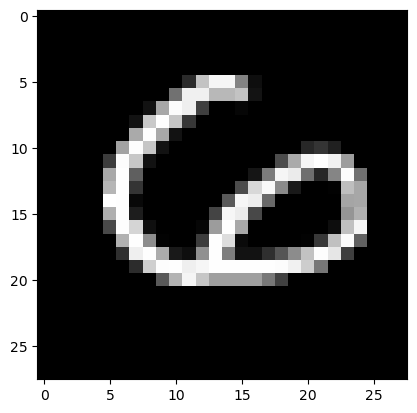

Prediction:  [0]
Label:  5


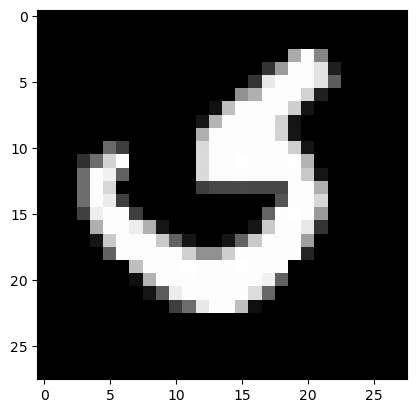

Prediction:  [7]
Label:  7


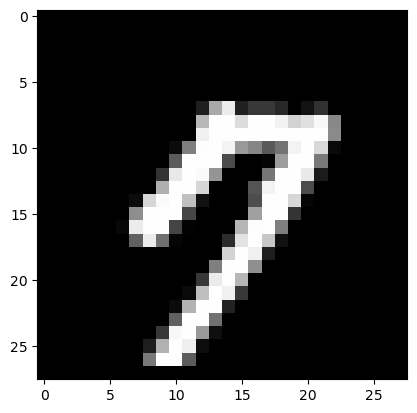

Prediction:  [8]
Label:  8


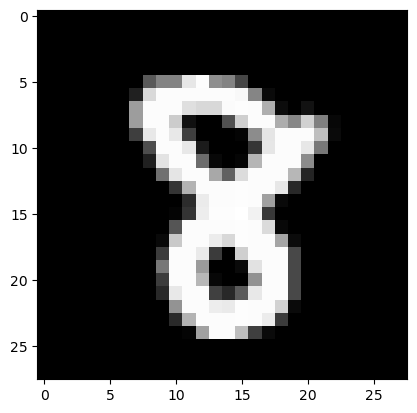

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)